# Palmer Penguins Dataset Analysis
## CS14003 - Project 2: Decision Tree

**Dataset**: Palmer Penguins Dataset  
**Task**: Multi-class classification (Species: Adelie, Chinstrap, Gentoo)  
**Samples**: 344  
**Features**: Physical characteristics (bill, flipper, body mass, etc.)

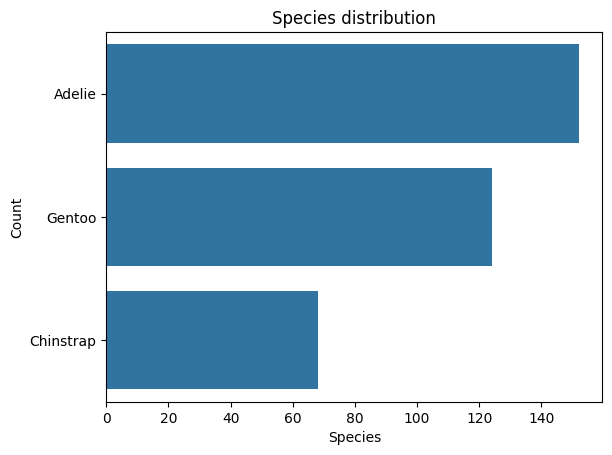

Test size 0.6 - Accuracy: 0.9662
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        91
   Chinstrap       0.98      1.00      0.99        41
      Gentoo       0.96      0.96      0.96        75

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



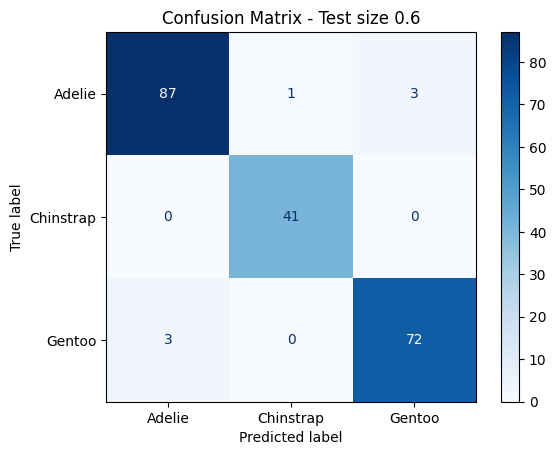

Test size 0.4 - Accuracy: 0.9710
              precision    recall  f1-score   support

      Adelie       0.98      0.95      0.97        61
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       0.98      0.98      0.98        50

    accuracy                           0.97       138
   macro avg       0.96      0.98      0.97       138
weighted avg       0.97      0.97      0.97       138



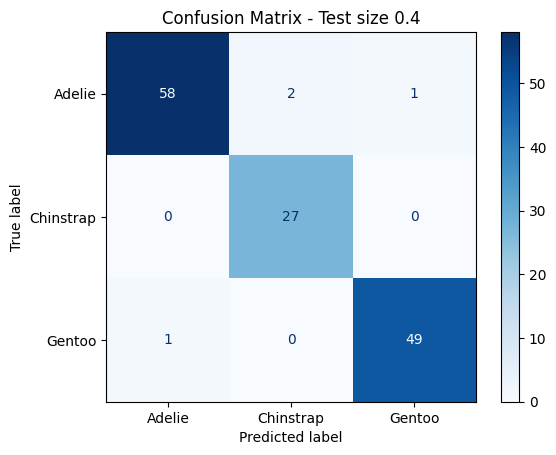

Test size 0.2 - Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



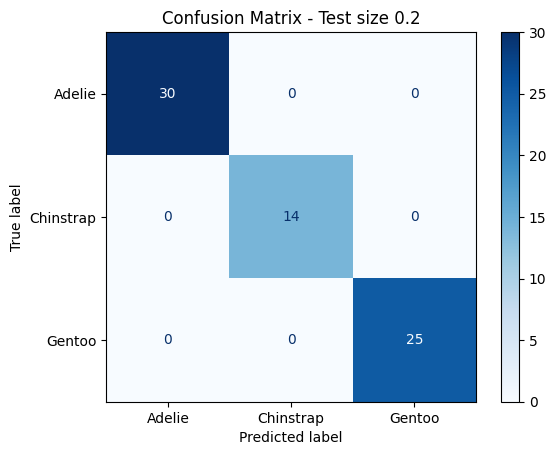

Test size 0.1 - Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



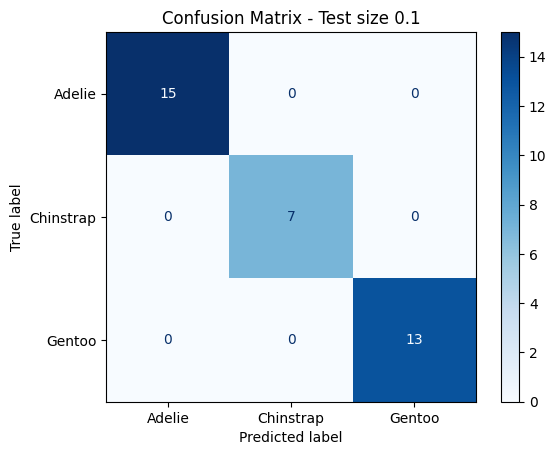


[Depth: None] Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



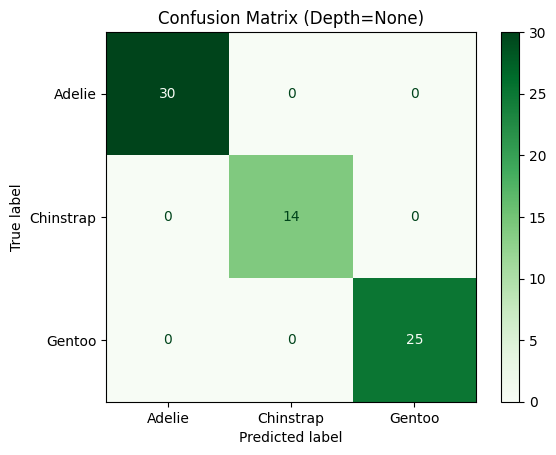


[Depth: 2] Accuracy: 0.9710
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        30
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



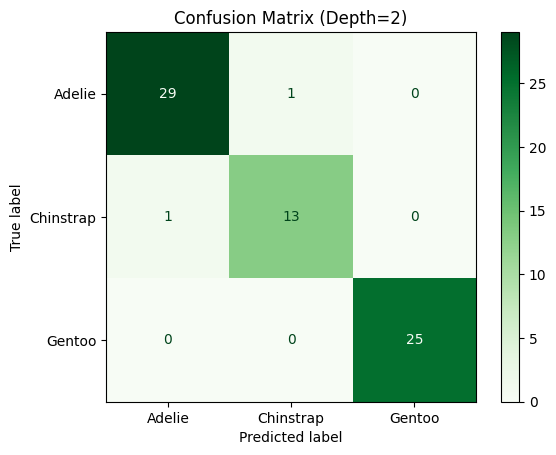


[Depth: 3] Accuracy: 0.9855
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        30
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



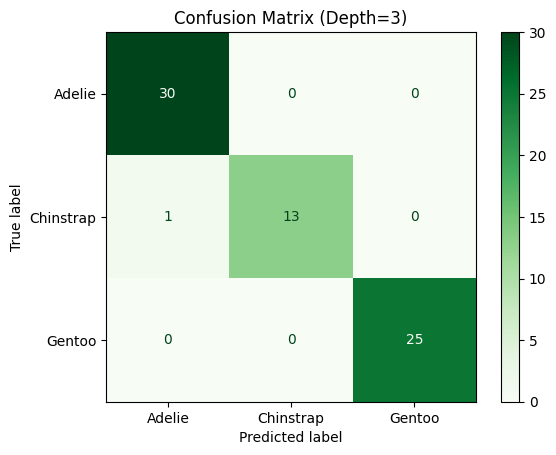


[Depth: 4] Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



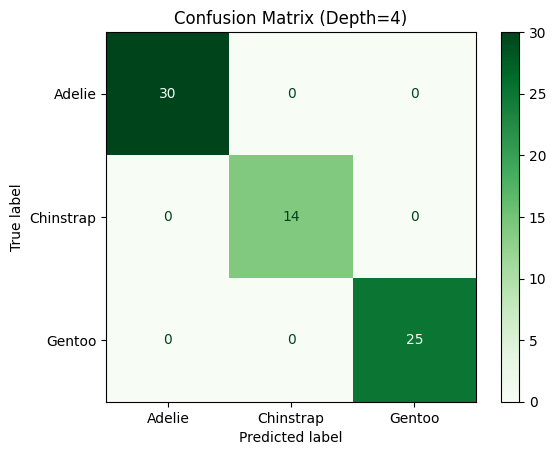


[Depth: 5] Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



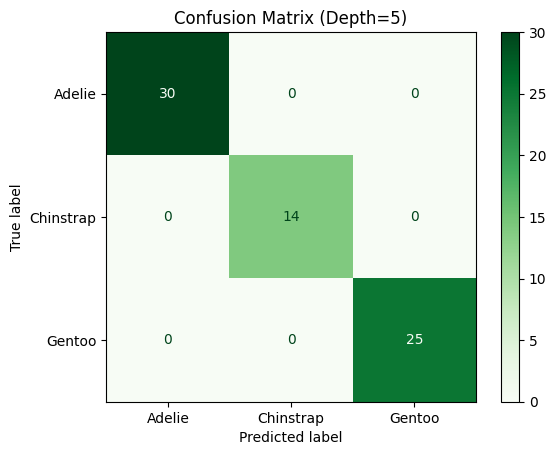


[Depth: 6] Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



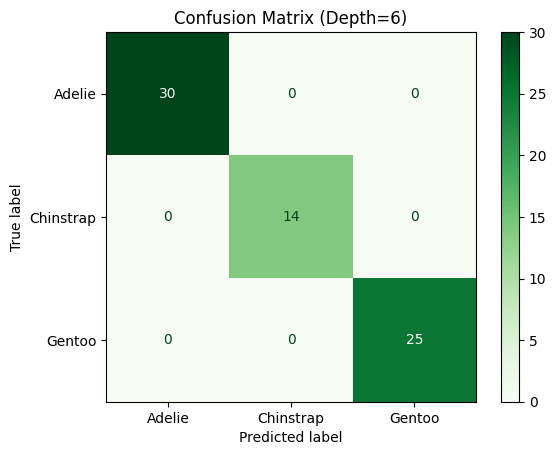


[Depth: 7] Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



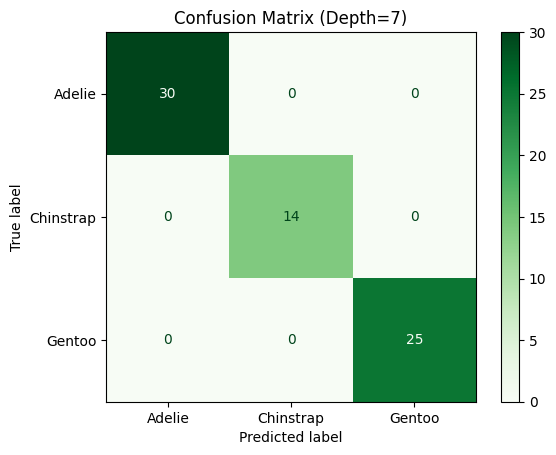

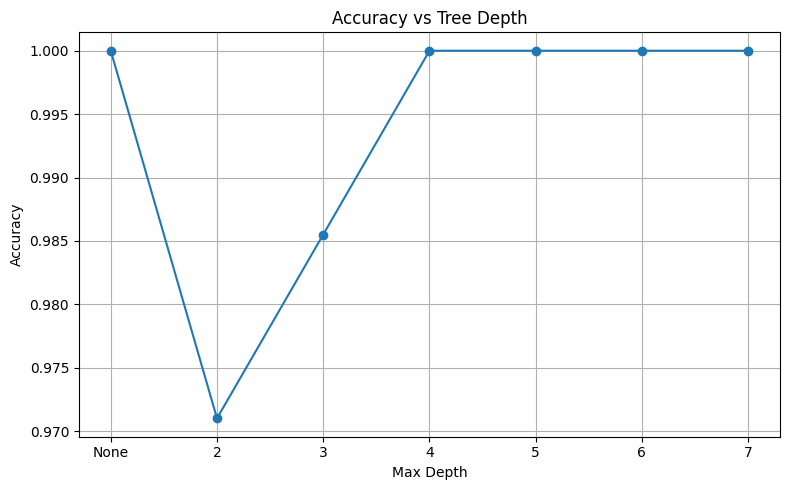

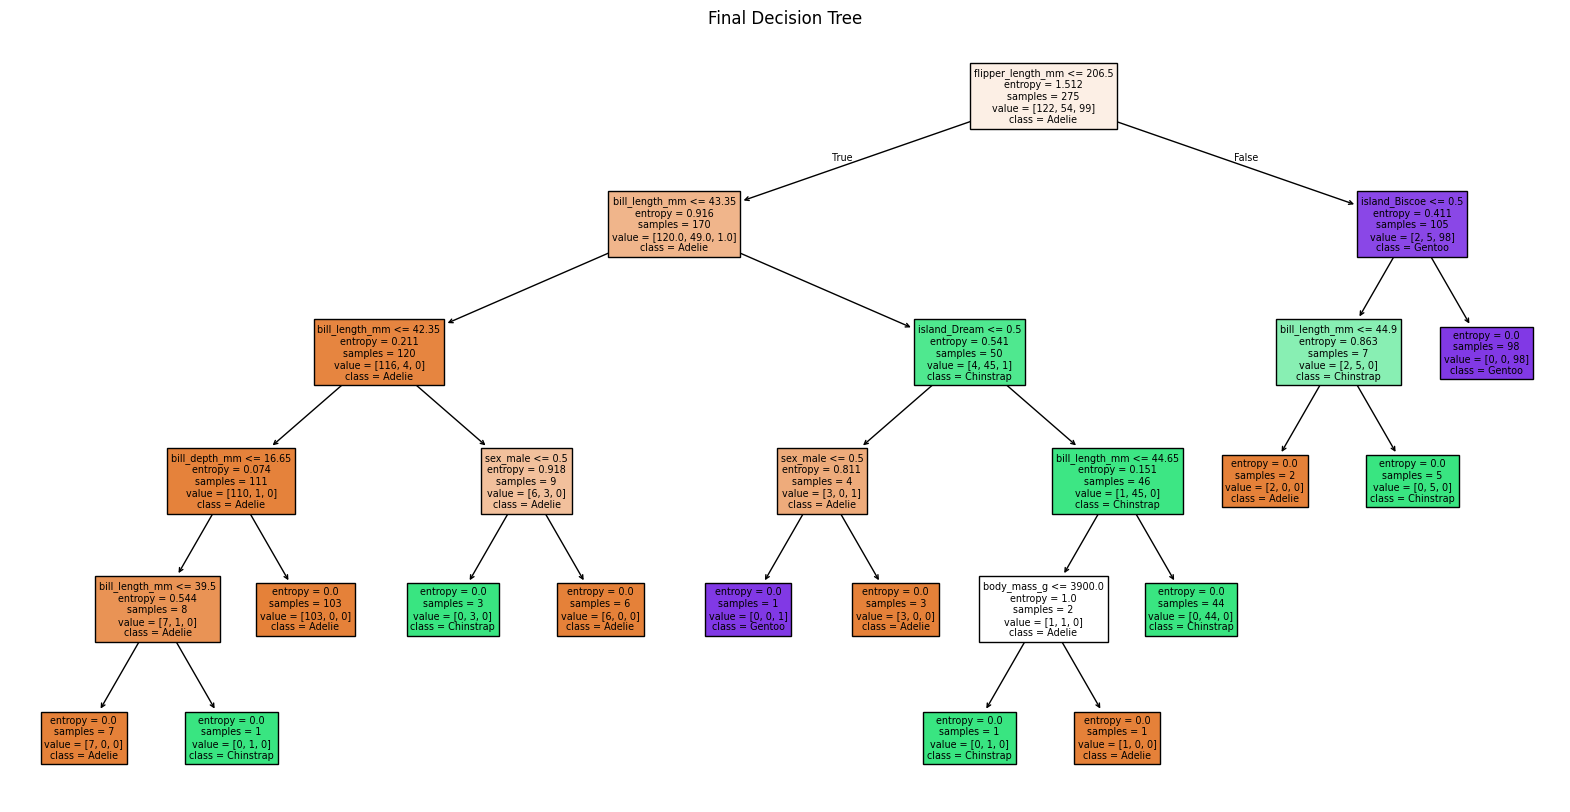

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load dataset
penguins = pd.read_csv("../data/penguins.csv")
y = penguins["species"]
X = penguins.drop(columns=["species"])
X = pd.get_dummies(X)

# Visualize label distribution
sns.countplot(y)
plt.title("Species distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# Train/test split proportions
splits = [0.6, 0.4, 0.2, 0.1]
results = []
for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test size {test_size:.1f} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Test size {test_size:.1f}")
    plt.show()
    results.append((test_size, acc))

# Depth analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n[Depth: {d}] Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
    disp.plot(cmap="Greens")
    plt.title(f"Confusion Matrix (Depth={d})")
    plt.show()
    accuracies.append(acc)

# Plot accuracy vs depth
plt.figure(figsize=(8, 5))
plt.plot(["None" if d is None else d for d in depths], accuracies, marker='o')
plt.title("Accuracy vs Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: visualize final tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Final Decision Tree")
plt.show()
